## Pandas basics


In [2]:
import pandas as pd

### Series

In [3]:
values = [1, 3, 9, 10]

series = pd.Series(values)

series
# Talk about the type, modify one value and show seriesastype(int)

0     1
1     3
2     9
3    10
dtype: int64

In [10]:
# Indices

series = pd.Series(values, index = ['a', 'b', 'c', 'd'])

series

a     1
b     3
c     9
d    10
dtype: int64

In [ ]:
# Using a dict
stock_prices = { 
    'AAPL': 175.2, 'MSFT': 332.2, 'GOOG': 125.2, 'AMAZ': 120.4,
    'NVIDA': 389.0, 'META': 262.1, 'TSLA': 193.2
}

series = pd.Series(stock_prices)

series

### DataFrames

In [ ]:
# From a dictionary
shapes = {
    'width': [12.1, 15.2, 55, 19.1, 20.1],
    'length': [2, 12.1, 8.0, 9.6, 10],
    'height': [3, 4.2, 8.2, 3.2, 3.1]
}

df = pd.DataFrame(shapes)

df = pd.DataFrame(shapes, index=['shape1', 'shape2', 'shape3', 'shape4', 'shape5'])

df

In [ ]:
# Get a row/rows (with name and index)
df.iloc[0]

In [ ]:
# Get a column/columns
df['width']

In [ ]:
# Get a range of rows and columns
df.loc[['shape1', 'shape2'], ['width', 'height']]

### Wine quality dataset

In [24]:
wine_quality_url = "./data/winequality-red.csv"

df = pd.read_csv(wine_quality_url)

In [25]:
# Head
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,NaN,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [26]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1596 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1593 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1597 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1597 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


In [31]:
# isnull
df.isnull()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


In [70]:
# Aggregating methods such as sum, mean, median etc.
df.sum()

# df.isnull().any(axis = 0)

fixed acidity           13281.20000
volatile acidity          843.98500
citric acid               433.29000
residual sugar           4059.55000
chlorides                 139.85900
free sulfur dioxide     25384.00000
total sulfur dioxide    74144.00000
density                  1593.79794
pH                       5294.47000
sulphates                1052.38000
alcohol                 16666.35000
quality                  9000.00000
dtype: float64

In [40]:
# Boolean masking
# list of indices to a boolean masking [0,3,6] -> [True, False, False, True, False, False, True]

s = pd.Series([10.2, 12.1, 13., 14, 20, 12, 40.1])

s[[0,3,6]]
s[[True, False, False, True, False, False, True]]

0    10.2
3    14.0
6    40.1
dtype: float64

In [ ]:
# Query with boolean masking
mask = df['residual sugar'] > 8

print(mask)

df[mask]

In [69]:
# More Complex Query, find all pH values for wines with citric acid between 0.7 and 0.75
df[(df['citric acid'] > 0.7) & (df['citric acid'] < 0.75)]['pH']

205    3.20
206    3.20
375    3.01
437    3.17
440    2.88
501    3.17
502    3.17
539    3.22
544    2.86
Name: pH, dtype: float64

### Exercise 2: Calculate the mean value of pH and density for all wines with quality equal and above 7

### Exercise 3 (Bonus): Print all rows with missing values

### Cleaning Data

In [76]:
df.fillna({'citric acid': 0})

In [79]:
df.drop(columns=['chlorides'], inplace=True)

In [81]:
df.ffill()

,fixed acidity,volatile acidity,citric acid,residual sugar,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
1,7.8,0.880,0.00,2.6,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,7.8,0.760,0.04,2.3,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
3,11.2,0.280,0.56,1.9,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
4,7.4,0.700,0.00,1.9,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,32.0,44.0,0.99490,3.45,0.58,10.5,5.0
1595,5.9,0.550,0.10,2.2,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1596,6.3,0.510,0.13,2.3,29.0,40.0,0.99574,3.42,0.75,11.0,6.0
1597,5.9,0.645,0.12,2.0,32.0,44.0,0.99547,3.57,0.71,10.2,5.0


### Modifiying

In [ ]:
# Creating a new column
df['total acidity'] = df['volatile acidity'] + df['citric acid']

In [85]:
# Aggregate using one or more operations over the specified axis.
df.agg(['sum', 'min', 'max', 'mean', 'std'])

,fixed acidity,volatile acidity,citric acid,residual sugar,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
sum,13281.200000,843.985000,433.290000,4059.550000,25384.000000,74144.000000,1593.797940,5294.470000,1052.380000,16666.350000,9000.000000
min,4.600000,0.120000,0.000000,0.900000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
max,15.900000,1.580000,1.000000,15.500000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000
mean,8.321554,0.527821,0.270976,2.538806,15.874922,46.427051,0.996747,3.311113,0.658149,10.422983,5.635567
std,1.741350,0.179060,0.194801,1.409928,10.460157,32.804943,0.001887,0.154386,0.169507,1.065668,0.807972


In [90]:
# Group by: calculating the mean of each column with each quality group
df.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,
3.0,11.6,1.580,0.66,5.7,34.0,49.0,1.00080,3.63,0.86,11.0
4.0,12.5,1.130,1.00,12.9,41.0,119.0,1.00100,3.90,2.00,13.1
5.0,15.9,1.330,0.79,15.5,68.0,155.0,1.00315,3.74,1.98,14.9
6.0,14.3,1.040,0.78,15.4,72.0,165.0,1.00369,4.01,1.95,14.0
7.0,15.6,0.915,0.76,8.9,54.0,289.0,1.00320,3.78,1.36,14.0
8.0,12.6,0.850,0.72,6.4,42.0,88.0,0.99880,3.72,1.10,14.0


## Plotting

<Axes: ylabel='Frequency'>

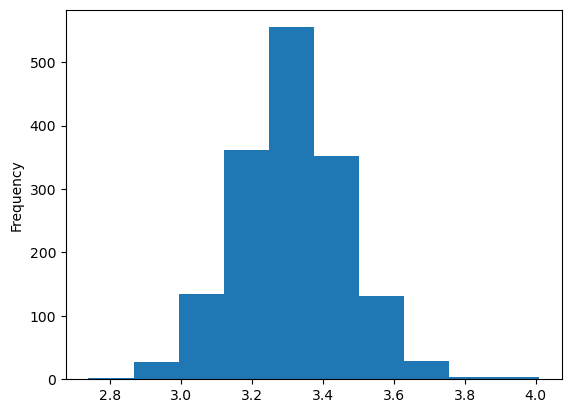

In [74]:
df['pH'].plot.hist()

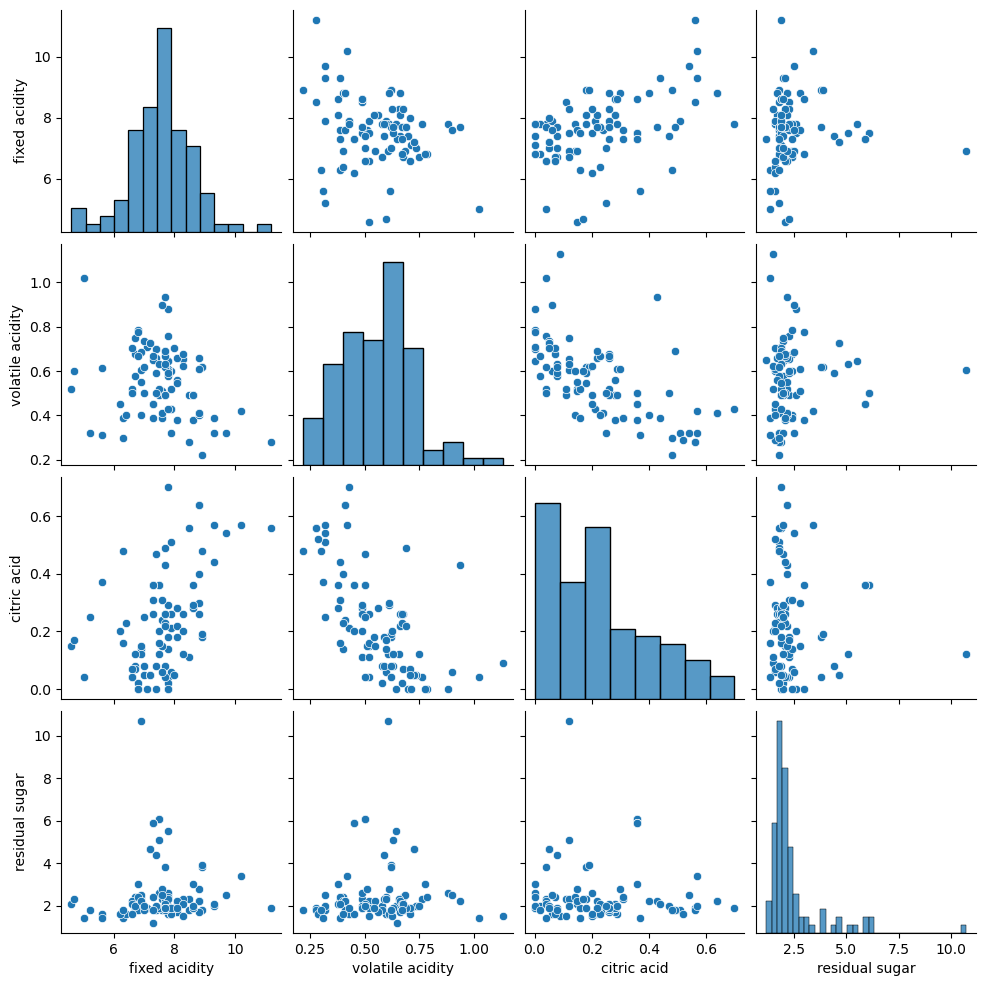

In [75]:
import seaborn

seaborn.pairplot(df.iloc[:100, :4])